
<h2>Sai Krishna 
<h2>ph22mscst11003

<h1>/QUESTION 1
<h4>Redo figure 3.5 in astroml book https://www.astroml.org/book_figures/

chapter3/fig_flux_errors.html with 5%, 10% and 20% flux error. Com-
ment on whether the magnitude distribution is assymetric in all the three cases.

In [25]:
import numpy as np
from matplotlib import pyplot as plt
import scipy
from scipy.stats import norm,cauchy
def ques1(err):
    np.random.seed(23)
    dist = norm(1, err)
    flux = dist.rvs(10000)
    flux_fit = np.linspace(0.001, 2, 1000)
    pdf_flux_fit = dist.pdf(flux_fit)
    # transform this distribution into magnitude space
    mag = -2.5 * np.log10(flux)
    mag_fit = -2.5 * np.log10(flux_fit)
    pdf_mag_fit = pdf_flux_fit.copy()
    pdf_mag_fit[1:] /= abs(mag_fit[1:] - mag_fit[:-1])
    pdf_mag_fit /= np.dot(pdf_mag_fit[1:], abs(mag_fit[1:] - mag_fit[:-1]))
    return flux,flux_fit,pdf_flux_fit,mag,mag_fit,pdf_mag_fit
def p(err,flux,flux_fit,pdf_flux_fit,mag,mag_fit,pdf_mag_fit):
    fig = plt.figure(figsize=(15, 12.5))
    fig.subplots_adjust(bottom=0.17, top=0.9,
    left=0.12, right=0.95, wspace=0.3)
    # first plot the flux distribution
    ax = fig.add_subplot(121)
    ax.hist(flux, bins=np.linspace(0, 2, 50),
    histtype='stepfilled', fc='orange', alpha=0.5, density=True)
    ax.plot(flux_fit, pdf_flux_fit, '-k')
    ax.plot([1, 1], [0, 9], ':k', lw=1)
    ax.set_xlim(-0.1, 2.1)
    ax.set_ylim(0, 9.8)
    ax.set_xlabel(r'${\rm flux}$')
    ax.set_ylabel(r'$p({\rm flux})$')
    ax.yaxis.set_major_locator(plt.MultipleLocator(0.4))
    ax.text(0.04, 0.95, fr'${{\rm {err}\%\ flux\ error}}$',
    ha='left', va='top', transform=ax.transAxes)
    # next plot the magnitude distribution
    ax = fig.add_subplot(122)
    ax.hist(mag, bins=np.linspace(-1, 2, 50),
    histtype='stepfilled', fc='green', alpha=0.5, density=True)
    ax.plot(mag_fit, pdf_mag_fit, '-k')
    ax.plot([0, 0], [0, 9], ':k', lw=1)
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(0, 9.8)
    ax.yaxis.set_major_locator(plt.MultipleLocator(0.4))
    ax.text(0.04, 0.95, r'${\rm mag} = -2.5\log_{10}({\rm flux})$',
    ha='left', va='top', transform=ax.transAxes)
    ax.set_xlabel(r'${\rm mag}$')
    ax.set_ylabel(r'$p({\rm mag})$')
    plt.show()

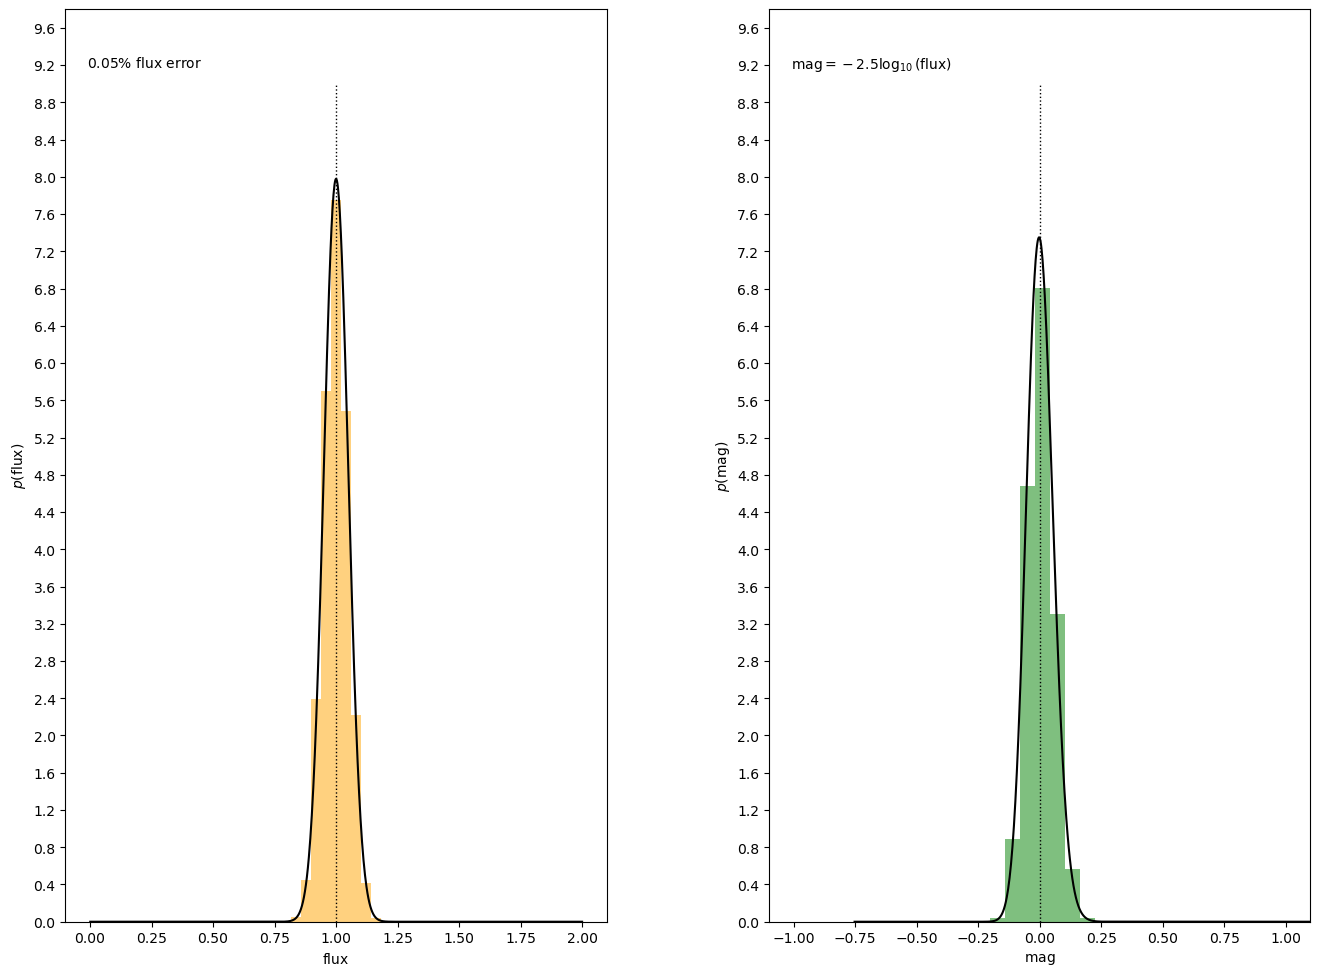

In [26]:
err=0.05
flux,flux_fit,pdf_flux_fit,mag,mag_fit,pdf_mag_fit=ques1(err)
p(err,flux,flux_fit,pdf_flux_fit,mag,mag_fit,pdf_mag_fit)


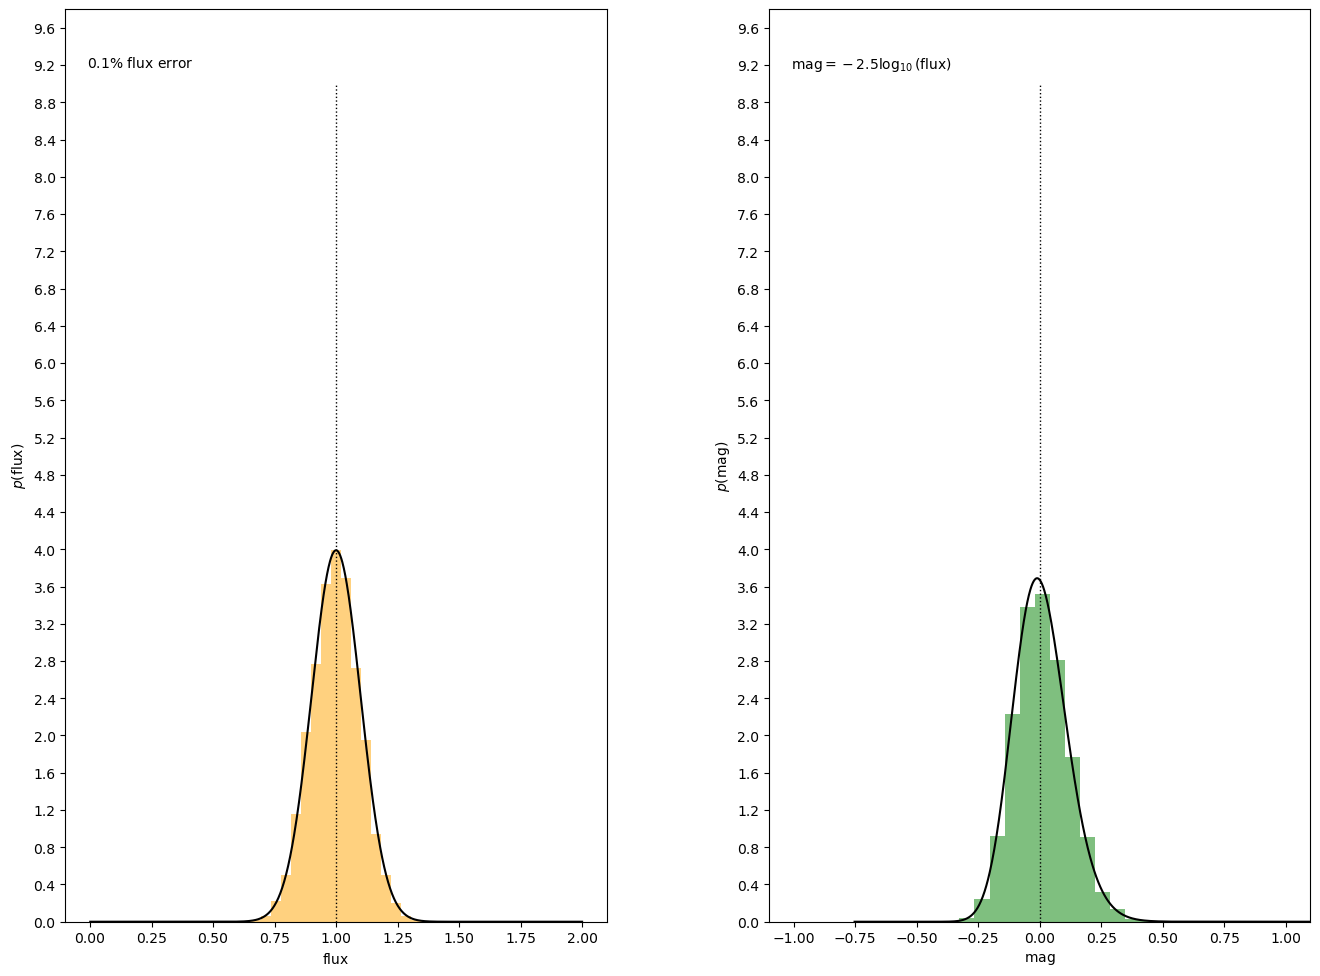

In [27]:
err=0.1
flux,flux_fit,pdf_flux_fit,mag,mag_fit,pdf_mag_fit=ques1(err)
p(err,flux,flux_fit,pdf_flux_fit,mag,mag_fit,pdf_mag_fit)

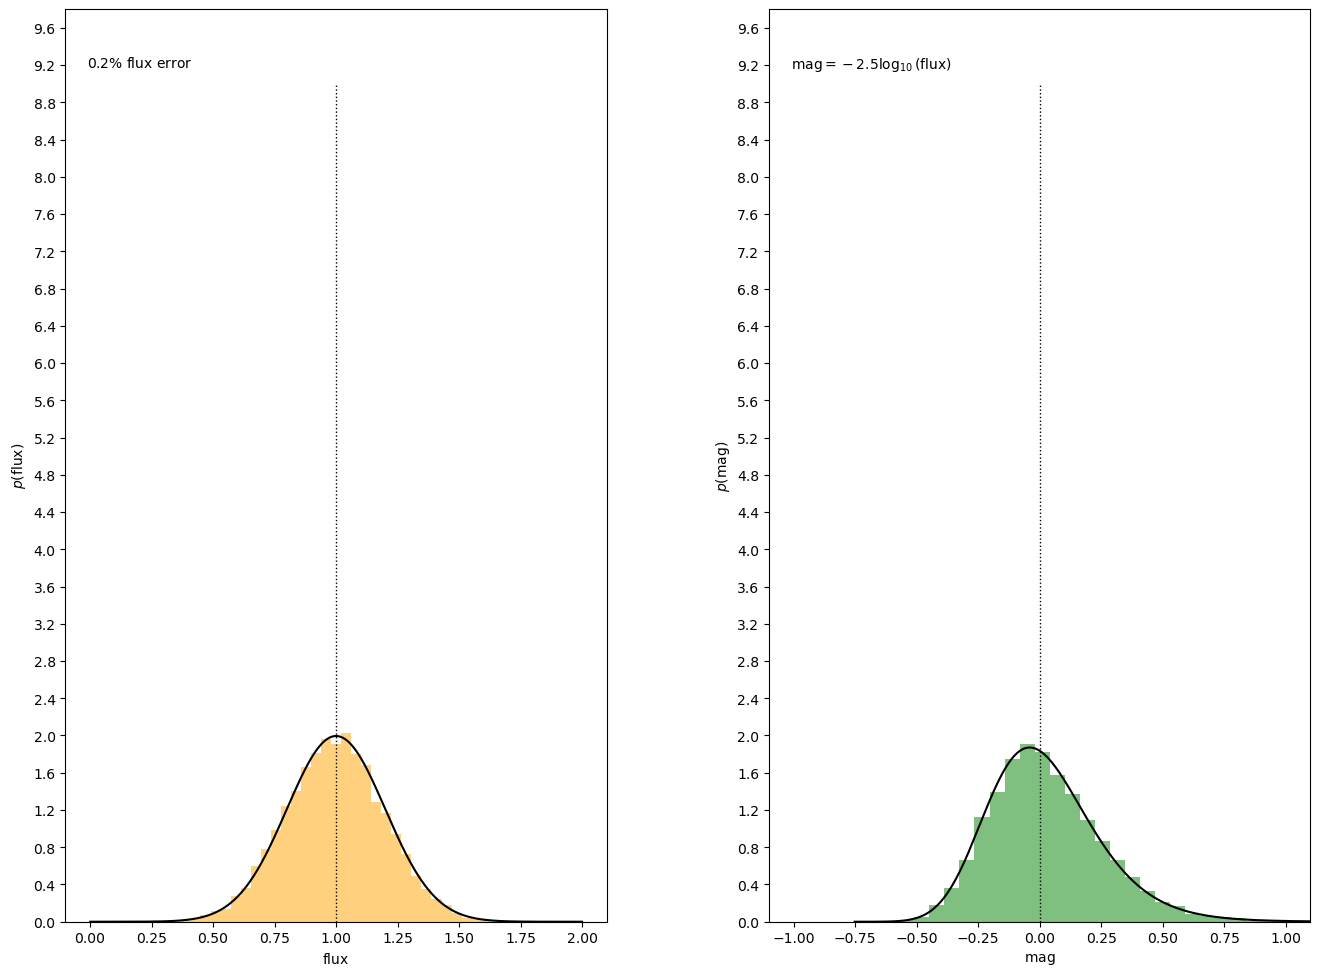

In [28]:
err=0.2
flux,flux_fit,pdf_flux_fit,mag,mag_fit,pdf_mag_fit=ques1(err)
p(err,flux,flux_fit,pdf_flux_fit,mag,mag_fit,pdf_mag_fit)

<h2>Comment on the Magnitude Distribution :
    
<h3>Magnitude is clearly assymetric in 10% and 20% error , but it almost symmentric in 5% error but by looking closly at the plot it is asymmentric 

<h1>QUESTION 2
    <h4>Create 1000 draws from a normal distribution of mean of 1.5 and standard
deviation of 0.5. Plot the pdf. Calculate the sample mean, variance,
skewness, kurtosis as well as standard deviation using MAD and σG of
these samples.

In [29]:
import scipy
np.random.seed(20)

In [30]:
dist = norm(1.5, 0.5)
dd = dist.rvs(1000)
flux_fit = np.linspace(0.001, 2, 1000)
d= dist.pdf(flux_fit)

a=np.mean(d)
print("the mean is :",a,"\n")
a=np.var(d)
print("the varience is :",a,"\n")
a=scipy.stats.skew(d)
print("the skewness is:",a,"\n")
a=scipy.stats.kurtosis(d)
print("the kurtosis :",a,"\n")
a=np.median(np.abs(d-np.median(d)))
print("the meadian_absolute_deviation(MAD) is :",a,"\n")
std=1.482*(a)
print("the standard deviation using MAD is:",std,"\n")
q25,q75=np.percentile(d,[25,75])
Sg=0.7413*(q75-q25)
print("the sigmaG is :",Sg,"\n")

the mean is : 0.4200291362355159 

the varience is : 0.0834674831757353 

the skewness is: -0.13212194150814116 

the kurtosis : -1.5737190570740542 

the meadian_absolute_deviation(MAD) is : 0.2746530141059473 

the standard deviation using MAD is: 0.40703576690501386 

the sigmaG is : 0.4415535650597485 



<h1>QUESTION 3
    <h4>Plot a Cauchy distribution with μ=0 and γ=1.5 superposed on the top of
a Gaussian distribution with μ=0 and σ=1.5. Use two different line styles
to distinguish between the Gaussan and Cauchy distribution on the plot
and also indicate these in the legends.

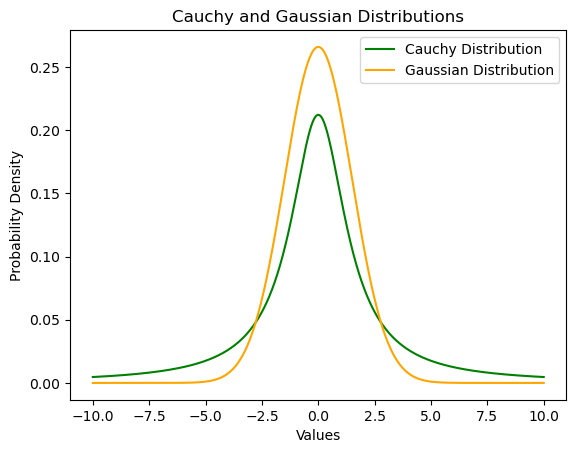

In [9]:


# Generate x values for the plot
x = np.linspace(-10, 10, 1000)

# Calculate the probability density functions (pdf) for Cauchy and Gaussian distributions
pdf_cauchy = scipy.stats.cauchy.pdf(x, 0, 1.5)
pdf_gaussian = scipy.stats.norm.pdf(x, 0, 1.5)

# Plot the distributions
plt.plot(x, pdf_cauchy, label='Cauchy Distribution', color='green')
plt.plot(x, pdf_gaussian, label='Gaussian Distribution', color='orange')

# Add legend and labels
plt.legend()
plt.xlabel('Values')
plt.ylabel('Probability Density')
plt.title('Cauchy and Gaussian Distributions')

# Show the plot
plt.show()

<h1>QUETSION 4
    <h4>Plot Poisson distribution with mean of 5, superposed on top of a Gaussian
distribution with mean of 5 and standard deviation of square root of 5.
Use two different line styles for the two distributions and make sure the
plot contains legends for both of them.

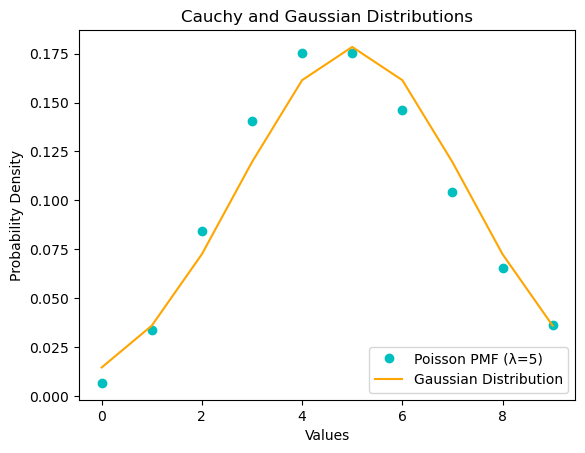

In [11]:
x = np.arange(0, 10)

pmf_poisson = scipy.stats.poisson.pmf(x, 5)
pdf_gaussian = scipy.stats.norm.pdf(x, 5, np.sqrt(5))
pmf_poisson = scipy.stats.poisson.pmf(x, mu=5)


plt.plot(x, pmf_poisson,'co', label='Poisson PMF (λ=5)')

plt.plot(x, pdf_gaussian, label='Gaussian Distribution', color='orange')

plt.legend()
plt.xlabel('Values')
plt.ylabel('Probability Density')
plt.title('Cauchy and Gaussian Distributions')

plt.show()

<h1>Question 5
    <h4>The following were the measurements of mean lifetime of K meson (as of
1990) (in units of 10−10 s) :
0.8920±0.00044; 0.881±0.009; 0.8913±0.00032; 0.9837±0.00048; 0.8958±
0.00045. Calculate the weighted mean lifetime and uncertainty of the
mean.

In [31]:
val,er=[0.8920,0.881,0.8913,0.9837,0.8958],[0.00044,0.009,0.00032,0.00048,0.00045]
val=np.array(val)
er=np.array(er)
weighted_mean=(np.sum(val/(er**2)))/(np.sum(1/(er**2)))
uncertanity_W_mean=(1/np.sqrt(np.sum(1/er**2)))
print("The weighted mean lifetime is :",weighted_mean," x 10^-10 s ","\n")
print("The uncertainty of the mean is:",uncertanity_W_mean," x 10^-10 s")

The weighted mean lifetime is : 0.9089185199574897  x 10^-10 s  

The uncertainty of the mean is: 0.00020318737026848627  x 10^-10 s


<h1>QUESTION 6
    <h4>Download the eccentricity distribution of exoplanets from the exoplanet
catalog http://exoplanet.eu/catalog/. Look for the column titled e,
which denotes the eccentricity. Draw the histogram of this distribution.
Then redraw the same histogram after Gaussianizing the distribution using

Box-transformation either using scipy.stats.boxcox or from first prin-
ciples using the equations shown in class or in arXiv:1508.00931. Note

that exoplanets without eccentricity data can be ignored.

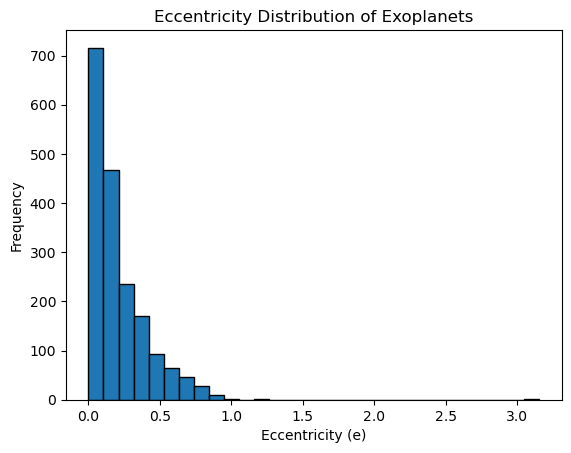

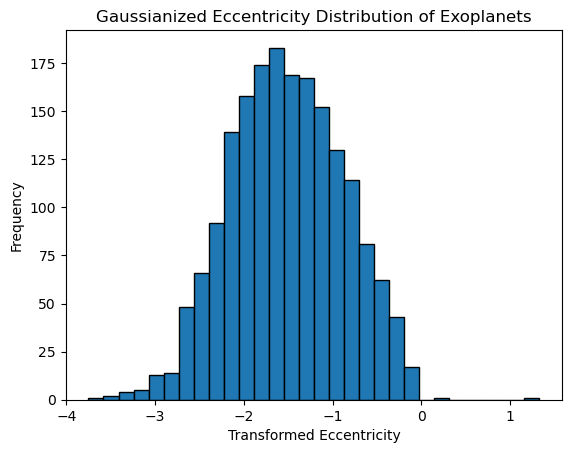

In [33]:
import pandas as pd
dd=pd.read_csv("download.csv")
e=pd.DataFrame(dd["eccentricity"])
eee=e.dropna()
eee=pd.DataFrame(eee)
ee=eee[eee["eccentricity"]>0]
plt.hist(ee["eccentricity"],bins=30,edgecolor='black')
plt.title('Eccentricity Distribution of Exoplanets')
plt.xlabel('Eccentricity (e)')
plt.ylabel('Frequency')
plt.show()
c,d=scipy.stats.boxcox(ee["eccentricity"])
plt.hist(c,bins=30,edgecolor='black')
plt.title('Gaussianized Eccentricity Distribution of Exoplanets')
plt.xlabel('Transformed Eccentricity')
plt.ylabel('Frequency')
plt.show()

<h3> so, as we can see in the above histogram , we have successfully guassianized the data using the scipy.stats.boxcox()